In [2]:
import json
import pandas as pd
import numpy as np

In [3]:
with open("C:\\Users\\91799\\Downloads\\intents.json") as f:
    data = json.load(f)

In [4]:
df = pd.DataFrame(data['intents'])

In [5]:
df

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."
...,...,...,...
75,fact-28,[What do I do if I'm worried about my mental h...,[The most important thing is to talk to someon...
76,fact-29,[How do I know if I'm unwell?],"[If your beliefs , thoughts , feelings or beha..."
77,fact-30,[How can I maintain social connections? What i...,"[A lot of people are alone right now, but we d..."
78,fact-31,[What's the difference between anxiety and str...,[Stress and anxiety are often used interchange...


In [6]:
range(len(df))

range(0, 80)

In [7]:
df.iloc[df.index]

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."
...,...,...,...
75,fact-28,[What do I do if I'm worried about my mental h...,[The most important thing is to talk to someon...
76,fact-29,[How do I know if I'm unwell?],"[If your beliefs , thoughts , feelings or beha..."
77,fact-30,[How can I maintain social connections? What i...,"[A lot of people are alone right now, but we d..."
78,fact-31,[What's the difference between anxiety and str...,[Stress and anxiety are often used interchange...


In [8]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)
        
df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 232,
 'word_counts': '{"hi": 2, "hey": 2, "is": 13, "anyone": 2, "there": 5, "hello": 1, "howdy": 1, "hola": 1, "bonjour": 1, "konnichiwa": 1, "guten": 1, "tag": 1, "ola": 1, "good": 5, "morning": 1, "afternoon": 1, "evening": 1, "night": 1, "bye": 3, "see": 2, "you": 38, "later": 1, "goodbye": 1, "au": 1, "revoir": 1, "sayonara": 1, "ok": 4, "then": 1, "fare": 1, "thee": 1, "well": 2, "thanks": 2, "thank": 3, "that\'s": 3, "helpful": 1, "for": 10, "the": 10, "help": 6, "than": 1, "very": 3, "much": 4, "nothing": 3, "who": 6, "are": 15, "what": 29, "tell": 6, "me": 19, "more": 6, "about": 20, "yourself": 3, "your": 3, "name": 4, "should": 3, "i": 95, "call": 1, "what\'s": 3, "can": 16, "do": 14, "created": 2, "how": 8, "were": 2, "made": 1, "my": 13, "am": 17, "go": 4, "by": 1, "could": 2, "give": 1, "a": 12, "hand": 1, "ple

In [10]:
tokenizer.word_index

{'i': 1,
 'you': 2,
 'what': 3,
 'mental': 4,
 'to': 5,
 'about': 6,
 'me': 7,
 'health': 8,
 'am': 9,
 'can': 10,
 'feel': 11,
 'are': 12,
 'do': 13,
 'is': 14,
 'my': 15,
 'a': 16,
 "don't": 17,
 'for': 18,
 'the': 19,
 'so': 20,
 'have': 21,
 "i'm": 22,
 'want': 23,
 'how': 24,
 'of': 25,
 'that': 26,
 'know': 27,
 "can't": 28,
 'it': 29,
 'depression': 30,
 'myself': 31,
 'help': 32,
 'who': 33,
 'tell': 34,
 'more': 35,
 'need': 36,
 'like': 37,
 'where': 38,
 'learn': 39,
 'if': 40,
 'there': 41,
 'good': 42,
 'no': 43,
 'not': 44,
 'talk': 45,
 "you're": 46,
 'would': 47,
 'problems': 48,
 'and': 49,
 'illness': 50,
 'ok': 51,
 'much': 52,
 'name': 53,
 'go': 54,
 'lonely': 55,
 'stressed': 56,
 'because': 57,
 'away': 58,
 'some': 59,
 'all': 60,
 'else': 61,
 'exams': 62,
 'something': 63,
 'therapy': 64,
 'find': 65,
 'difference': 66,
 'between': 67,
 'bye': 68,
 'thank': 69,
 "that's": 70,
 'very': 71,
 'nothing': 72,
 'yourself': 73,
 'your': 74,
 'should': 75,
 "what's": 

In [11]:
len(tokenizer.word_index)

303

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])
X = pad_sequences(ptrn2seq, padding='post')
lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['tag'])

In [13]:
y

array([44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 55,  1, 10, 58, 43,
       43, 43, 43, 43, 43, 43, 43, 73, 73, 73, 73, 73, 60, 57,  0,  0,  0,
        0,  0,  0,  0,  0, 67,  5,  5,  5, 56, 56, 56, 48, 48, 48, 48, 48,
       48, 48, 65, 65, 65, 65, 65, 65, 65, 65, 70, 70, 70, 70, 70, 78, 78,
       78, 78, 78,  8,  8,  8,  8, 45, 45, 45, 45, 45, 45, 45,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  2,  2, 61, 61, 61, 61, 68, 68, 68,
       68, 68, 68, 66, 66, 66, 66,  6,  6,  6,  6,  6,  6, 74, 74, 74, 74,
       74, 74,  9,  9,  9,  9,  9, 72, 72, 72, 72, 72, 47, 47, 47, 46, 46,
       46,  7,  7,  7,  7,  7,  7,  7,  7, 49, 49, 64, 64, 64, 79, 79, 79,
       79, 71, 71, 71, 71, 52, 52, 52, 69, 69, 69, 69, 42,  3, 63, 63, 59,
       59, 59, 51, 51, 51, 76, 76, 53, 53, 77, 77, 62, 75, 75, 75, 50, 50,
       50, 54, 54, 11, 11, 22, 22, 33, 33, 37, 37, 37, 37, 38, 38, 39, 39,
       39, 40, 41, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26,
       27, 28, 29, 29, 30

In [14]:
X

array([[ 95,   0,   0, ...,   0,   0,   0],
       [ 96,   0,   0, ...,   0,   0,   0],
       [ 14,  97,  41, ...,   0,   0,   0],
       ...,
       [ 76,  19,  66, ...,   0,   0,   0],
       [ 76,  19,  66, ...,   0,   0,   0],
       [ 66,  67, 149, ...,   0,   0,   0]])

In [15]:
print(X.shape)

(232, 18)


In [16]:
X.shape[1]

18

In [17]:
from tensorflow.keras.models import Sequential
model = Sequential()
from tensorflow.keras.layers import Embedding,Input,LSTM,LayerNormalization,Dense,Dropout

In [18]:
model.add(Input(shape=(X.shape[1])))
model.add(Embedding(input_dim=304, output_dim=100, mask_zero=True))
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax"))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor='accuracy',mode='min',patience=25)

In [21]:
model.fit(x=X,y=y,epochs=600,callbacks=[early_stop],validation_data=[X,y])

Epoch 1/600
8/8 [==============================] - 21s 782ms/step - loss: 4.9398 - accuracy: 0.0216 - val_loss: 3.8282 - val_accuracy: 0.1164
Epoch 2/600
8/8 [==============================] - 0s 51ms/step - loss: 3.9575 - accuracy: 0.0948 - val_loss: 3.0626 - val_accuracy: 0.2931
Epoch 3/600
8/8 [==============================] - 0s 50ms/step - loss: 3.2982 - accuracy: 0.1983 - val_loss: 2.5653 - val_accuracy: 0.4138
Epoch 4/600
8/8 [==============================] - 0s 48ms/step - loss: 2.9220 - accuracy: 0.3103 - val_loss: 2.1993 - val_accuracy: 0.5216
Epoch 5/600
8/8 [==============================] - 0s 50ms/step - loss: 2.4629 - accuracy: 0.4397 - val_loss: 1.8578 - val_accuracy: 0.6422
Epoch 6/600
8/8 [==============================] - 0s 49ms/step - loss: 2.1855 - accuracy: 0.5043 - val_loss: 1.5806 - val_accuracy: 0.6810
Epoch 7/600
8/8 [==============================] - 0s 50ms/step - loss: 1.9823 - accuracy: 0.5776 - val_loss: 1.3609 - val_accuracy: 0.7672
Epoch 8/600
8/8 [=

In [22]:
losses = pd.DataFrame(model.history.history)

In [23]:
losses

,loss,accuracy,val_loss,val_accuracy
0,4.939821,0.021552,3.828211,0.116379
1,3.957482,0.094828,3.062616,0.293103
2,3.298162,0.198276,2.565341,0.413793
3,2.921985,0.310345,2.199260,0.521552
4,2.462892,0.439655,1.857802,0.642241
5,2.185501,0.504310,1.580603,0.681035
6,1.982263,0.577586,1.360852,0.767241
7,1.761666,0.607759,1.194122,0.814655
8,1.555177,0.689655,1.005953,0.866379
9,1.314100,0.728448,0.834588,0.892241


In [24]:
predictions = (model.predict(X) > 0.5).astype("int32")

8/8 [==============================] - 5s 12ms/step


<AxesSubplot:>

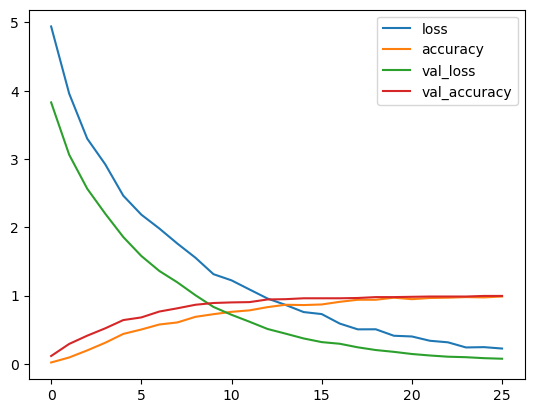

In [25]:
losses.plot()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [28]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
6/6 [==============================] - 0s 59ms/step - loss: 0.1964 - accuracy: 0.9877 - val_loss: 0.0728 - val_accuracy: 0.9857
Epoch 2/600
6/6 [==============================] - 0s 44ms/step - loss: 0.2271 - accuracy: 0.9753 - val_loss: 0.0664 - val_accuracy: 0.9857
Epoch 3/600
6/6 [==============================] - 0s 50ms/step - loss: 0.1866 - accuracy: 0.9938 - val_loss: 0.0642 - val_accuracy: 1.0000
Epoch 4/600
6/6 [==============================] - 0s 44ms/step - loss: 0.1952 - accuracy: 0.9877 - val_loss: 0.0677 - val_accuracy: 1.0000
Epoch 5/600
6/6 [==============================] - 0s 43ms/step - loss: 0.2347 - accuracy: 0.9877 - val_loss: 0.1646 - val_accuracy: 0.9571
Epoch 6/600
6/6 [==============================] - 0s 44ms/step - loss: 0.2821 - accuracy: 0.9444 - val_loss: 0.1743 - val_accuracy: 0.9857
Epoch 7/600
6/6 [==============================] - 0s 42ms/step - loss: 0.2763 - accuracy: 0.9506 - val_loss: 0.2052 - val_accuracy: 0.9714
Epoch 8/600
6/6 [===

In [44]:
import re
import random
@anvil.server.callable
def generate_answer(pattern): 
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', str(pattern))
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)
        
    x_test = tokenizer.texts_to_sequences(text)
    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df[df['tag'] == tag]['responses'].values[0]
    return(responses)

1/1 [==============================] - 0s 60ms/step


In [30]:
import pickle


In [31]:
pickle.dump(model,open('model.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\embedding
......vars
.........0
...layers\layer_normalization
......vars
.........0
.........1
...layers\layer_normalization_1
......vars
.........0
.........1
...layers\layer_normalization_2
......vars
.........0
.........1
...layers\layer_normalization_3
......vars
.........0
.........1
...layers\layer_normalization_4
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper


In [32]:
model = pickle.load(open('model.pkl','rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-01-28 10:18:36         7036
metadata.json                                  2023-01-28 10:18:36           64
variables.h5                                   2023-01-28 10:18:36      1222472
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\embedding
......vars
.........0
...layers\layer_normalization
......vars
.........0
.........1
...layers\layer_normalization_1
......vars
.........0
.........1
...layers\layer_normalization_2
......vars
.........0
.........1
...layers\layer_normalization_3
......vars
.........0
.........1
...layers\layer_normalization_4
......vars
.........0
.........1
...layers

In [37]:
generate_answer('I think I am anxious')

1/1 [==============================] - 0s 31ms/step
you: I think I am anxious
model: It helps to talk about what's happening. You're going to be okay


In [38]:
import anvil.server
anvil.server.connect("S4YQTPN25W5M5YUOU5BTHYCR-PKAXCW6IWNCH7THF")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


SyntaxError: unexpected EOF while parsing (1415785135.py, line 1)